In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import logging
tf.get_logger().setLevel(logging.ERROR)
import sys
sys.path.append('code/')
import net
import json
import os
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
import shutil
import glob
%matplotlib inline

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
path = 'AOI_5_Khartoum_Train/tfrecords/'
training_records = glob.glob(os.path.join(path, '*.tfrecords'))

In [32]:
training_records[55]

'AOI_5_Khartoum_Train/tfrecords/aoi5_khartoum_train_1196.tfrecords'

In [30]:
N_CLASSES = 2

tf.reset_default_graph()
training_samples = net.get_from_records(
    training_records[55], # A list of tfrecord filenames
    batch_size=5,
    buffer=1,
    shuffle=True,
)

iterator = tf.data.Iterator.from_structure(
    training_samples.output_types,
    training_samples.output_shapes
)
name, image, label = iterator.get_next()

model_path = 'saved_models/fcn8/'
model = net.inference(tf.cast(image, tf.float32))
prediction = tf.argmax(model, axis=3, name="prediction", output_type=tf.int32)
saver = tf.train.Saver()
last_chk_path = tf.train.latest_checkpoint(checkpoint_dir=model_path)

with tf.Session() as sess:
    mdl = last_chk_path
    saver.restore(sess, mdl)
    sess.run(iterator.make_initializer(training_samples))
    while True:
        try:
            names, img, lab, pred = sess.run([name, image, label, prediction])
        except tf.errors.OutOfRangeError:
            break


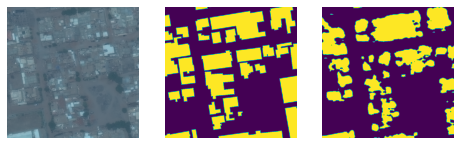

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(8, 4))
axes[0].imshow((img[0]+net.MEANS).astype(int))
axes[1].imshow(lab[0])
axes[2].imshow(pred[0])
[ax.axis('off') for ax in axes];